In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy.integrate import simps
from numpy import trapz
import glob
from astropy.io import fits
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context('paper')

In [6]:
goldilocks_files = glob.glob('C:/Users/jojoa/GitHub/disperse/data/HPF/Helium-transit-data/**/Goldilocks*.fits', recursive=True)

In [7]:
def get_goldilocks_dataframe(fn):
    """Return a pandas Dataframe given a Goldilocks FITS file name"""
    hdus = fits.open(fn)
    df_original = pd.DataFrame()
    for j in range(28):
        df = pd.DataFrame()
        for i in range(1, 10):
            name = hdus[i].name
            df[name] = hdus[i].data[j, :]
        df['order'] = j
        df_original = df_original.append(df, ignore_index=True)
    keep_mask = df_original[df_original.columns[0:6]] != 0.0
    df_original = df_original[keep_mask.all(axis=1)].reset_index(drop=True)
    
    return df_original

In [8]:
# The y values.  A numpy array is used here,
# but a python list could also be used.
y = np.array([5, 20, 4, 18, 19, 18, 7, 4])

# Compute the area using the composite trapezoidal rule.
area = trapz(y, dx=5)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(y, dx=5)
print("area =", area)

area = 452.5
area = 460.0


In [ ]:
../data/HPF/Helium-transit-data\HAT-P-32b\out-of-transit\20200807\Goldilocks_20200807T091125_v1.0_0037.spectra.fits

In [41]:
index = 162 # Pick a number in the range (0,410]
fn = goldilocks_files[index]
%time df = get_goldilocks_dataframe(fn)

Wall time: 384 ms


In [42]:
goldilocks_files[index]

'C:/Users/jojoa/GitHub/disperse/data/HPF/Helium-transit-data\\HAT-P-32b\\out-of-transit\\20200807\\Goldilocks_20200807T091125_v1.0_0037.spectra.fits'

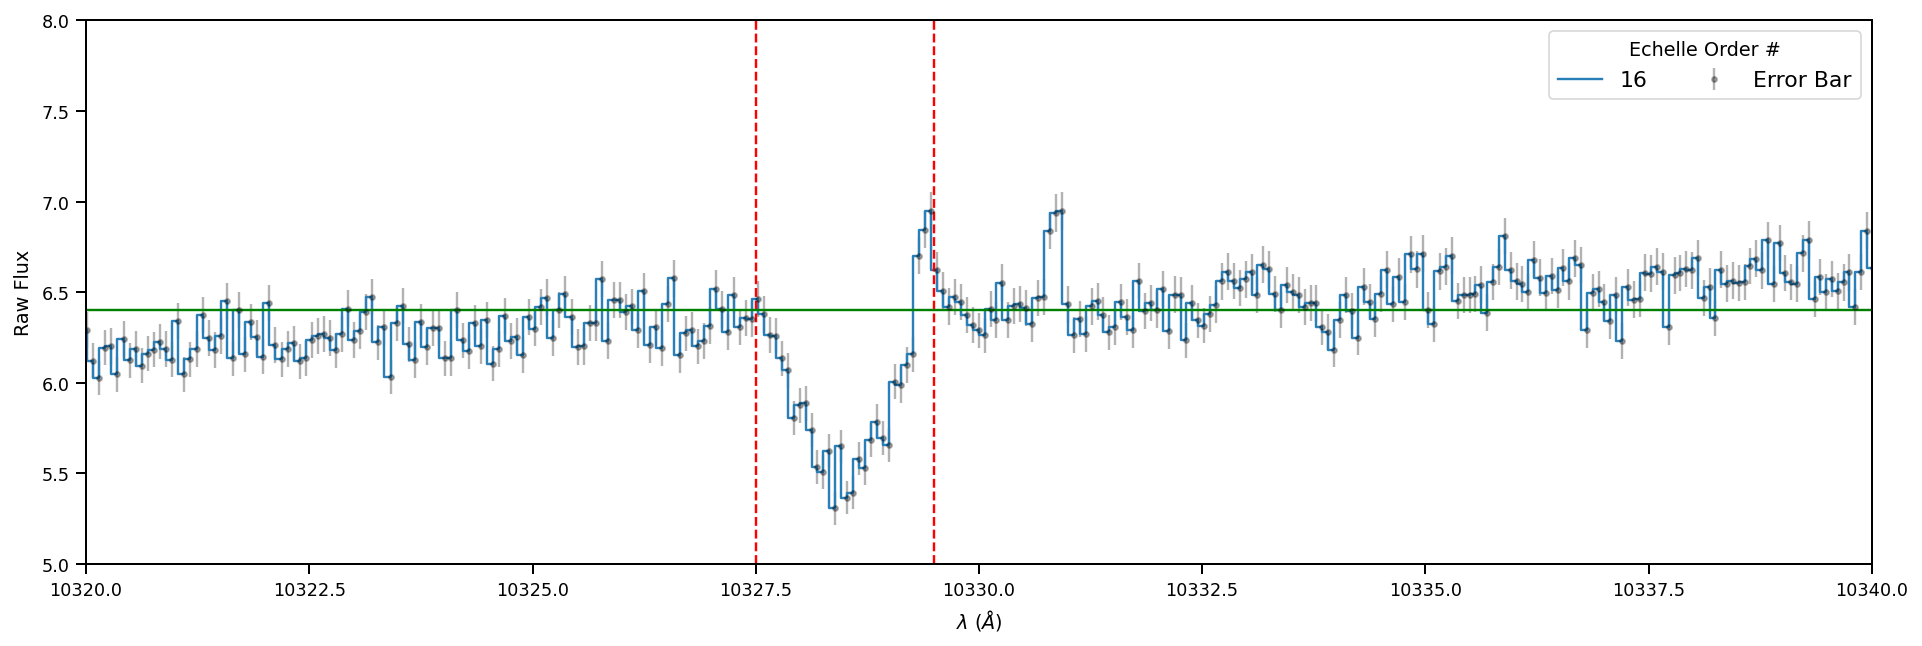

In [43]:
plt.figure(figsize=(16, 5))
order = 16
mask = df.order == order
plt.step(df['Sci Wavl'][mask], df['Sci Flux'][mask], label=order, color='#2980b9');
plt.errorbar(df['Sci Wavl'][mask], df['Sci Flux'][mask], df['Sci Error'][mask], fmt='.', c='k',
             label="Error Bar", alpha=0.3);
plt.xlabel('$\lambda$ ($\AA$)');
plt.ylabel('Raw Flux')
plt.legend(ncol=7, title='Echelle Order #', fontsize=11);
plt.ylim(5,8)
plt.xlim(10320,10340)
wavelength1 = 10327.5
wavelength2 = 10329.5
continuum = 6.4
plt.axvline(wavelength1,linestyle = 'dashed',color = 'red')
plt.axvline(wavelength2,linestyle = 'dashed',color = 'red')
plt.axhline(continuum,color = 'green')

In [60]:
sub_region = (df.order == order) & (df['Sci Wavl'] > wavelength1) & (df['Sci Wavl'] < wavelength2)
wl = df['Sci Wavl'][sub_region].values
flux = df['Sci Flux'][sub_region].values
unc = df['Sci Error'][sub_region].values

In [61]:
y = flux

#print("line =", line)

# Compute the area using the composite trapezoidal rule.
area_t = trapz(y, dx=.07)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area_s = simps(y, dx=.07)
print("area =", area)

area = 12.8
area = 12.8


In [62]:
area_b=continuum*(wavelength2-wavelength1)
area_b

12.8

In [63]:
area_b-area_t

0.8139122009277351

In [48]:
m=0.2
b=6.41
A=0.98
mu=10328.49
w=0.39
helium_line=10328

In [49]:
EW = ((2*np.pi)**.5)*(A*w)/(m*(mu-helium_line)+b)

In [50]:
EW

0.14720856277872996